In [8]:
%run jupyterQ.ipynb
%run gates.ipynb
%run init.ipynb

### One-qubit states
\begin{equation}
\rho_{qb} = \frac{1}{2}\left(\sigma_{0}+\sum_{j=1}r_{j}\sigma_{j}\right)
= 
\frac{1}{2}
\begin{bmatrix}
1+r_{3} & r_{1}-ir_{2} \\
r_{1}+ir_{2} & 1-r_{3}
\end{bmatrix}
\end{equation}

In [9]:
def rho1qb(r1, r2, r3):
    return (1/2)*(pauli(0) + r1*pauli(1) + r2*pauli(2) + r3*pauli(3))

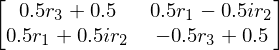

In [10]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}', real=True); rho1qb(r1,r2,r3)

### Two-qubit states
\begin{align}
\rho & = \frac{1}{4}\left(\sigma_{0}\otimes\sigma_{0} + \sigma_{0}\otimes\sum_{k=1}^{3}b_{k}\sigma_{k} + \sum_{j=1}^{3}a_{j}\sigma_{j}\otimes\sigma_{0} + \sum_{j,k=1}^{3}c_{jk}\sigma_{j}\otimes\sigma_{k}\right) \\
& = \frac{1}{4}
\begin{bmatrix}
1+a_{3}+b_{3}+c_{33} & b_{1}-ib_{2}+c_{31}-ic_{32} & a_{1}-ia_{2}+c_{13}-ic_{23} & c_{11}-c_{22}-i(c_{12}+c_{21}) \\
b_{1}+ib_{2}+c_{31}+ic_{32} & 1+a_{3}-b_{3}-c_{33} & c_{11}+c_{22}+i(c_{12}-c_{21}) & a_{1}-ia_{2}-c_{13}+ic_{23} \\
a_{1}+ia_{2}+c_{13}+ic_{23} & c_{11}+c_{22}-i(c_{12}-c_{21}) & 1-a_{3}+b_{3}-c_{33} & b_{1}-ib_{2}-c_{31}+ic_{32} \\
c_{11}-c_{22}+i(c_{12}+c_{21}) & a_{1}+ia_{2}-c_{13}-ic_{23} & b_{1}+ib_{2}-c_{31}-ic_{32} & 1-a_{3}-b_{3}+c_{33}
\end{bmatrix} \\
& = \frac{1}{4}\sum_{j,k=0}^{3}c_{j,k}\sigma_{j}\otimes\sigma_{k}
\end{align}

In [5]:
'''
a1,a2,a3,b1,b2,b3 = symbols('a_{1} a_{2} a_{3} b_{1} b_{2} b_{3}', real=True)
c11,c12,c13,c21,c22,c23,c31,c32,c33 = symbols('c_{11} c_{12} c_{13} c_{21} c_{22} c_{23} c_{31} c_{32} c_{33}', real=True)
def rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33):
    return (1/4)*(tp(Pauli(0),Pauli(0)) + b1*tp(Pauli(0),Pauli(1)) + b2*tp(Pauli(0),Pauli(2)) + b3*tp(Pauli(0),Pauli(3))
           + a1*tp(Pauli(1),Pauli(0)) + c11*tp(Pauli(1),Pauli(1)) + c12*tp(Pauli(1),Pauli(2)) + c13*tp(Pauli(1),Pauli(3))
           + a2*tp(Pauli(2),Pauli(0)) + c21*tp(Pauli(2),Pauli(1)) + c22*tp(Pauli(2),Pauli(2)) + c23*tp(Pauli(2),Pauli(3))
           + a3*tp(Pauli(3),Pauli(0)) + c31*tp(Pauli(3),Pauli(1)) + c32*tp(Pauli(3),Pauli(2)) + c33*tp(Pauli(3),Pauli(3)))
'''
def rho2qb(CM):
    return (1/4)*(tp(Pauli(0),Pauli(0)) + CM[0,1]*tp(Pauli(0),Pauli(1)) + CM[0,2]*tp(Pauli(0),Pauli(2)) + CM[0,3]*tp(Pauli(0),Pauli(3))
           + CM[1,0]*tp(Pauli(1),Pauli(0)) + CM[1,1]*tp(Pauli(1),Pauli(1)) + CM[1,2]*tp(Pauli(1),Pauli(2)) + CM[1,3]*tp(Pauli(1),Pauli(3))
           + CM[2,0]*tp(Pauli(2),Pauli(0)) + CM[2,1]*tp(Pauli(2),Pauli(1)) + CM[2,2]*tp(Pauli(2),Pauli(2)) + CM[2,3]*tp(Pauli(2),Pauli(3))
           + CM[3,0]*tp(Pauli(3),Pauli(0)) + CM[3,1]*tp(Pauli(3),Pauli(1)) + CM[3,2]*tp(Pauli(3),Pauli(2)) + CM[3,3]*tp(Pauli(3),Pauli(3)))

### Bell-diagonal states
\begin{align}
\rho & = \frac{1}{4}\left(\sigma_{0}\otimes\sigma_{0} + \sum_{j=1}^{3}c_{j}\sigma_{j}\otimes\sigma_{j}\right) \\
& = \frac{1}{4}
\begin{bmatrix}
1+c_{3} & 0 & 0 & c_{1}-c_{2} \\
0 & 1-c_{3} & c_{1}+c_{2} & 0 \\
0 & c_{1}+c_{2} & 1-c_{3} & 0 \\
c_{1}-c_{2} & 0 & 0 & 1+c_{3}
\end{bmatrix}
\end{align}

In [6]:
c1, c2, c3 = symbols('c_{1} c_{2} c_{3}', real=True)
def bds(c1,c2,c3):
    return (1/4)*(tp(Pauli(0),Pauli(0)) + c1*tp(Pauli(1),Pauli(1)) + c2*tp(Pauli(2),Pauli(2)) + c3*tp(Pauli(3),Pauli(3)))

In [7]:
#bds(1,-1,1)
#bds(-1,-1,-1)=psi-,  bds(-1,1,1)=phi-,  bds(1,1,-1)=psi+,  bds(1,-1,1)=phi+

### Werner state
\begin{equation}
\rho_{w} = (1-w)\frac{\mathbb{I}_{4}}{4} + w|\Psi_{-}\rangle\langle\Psi_{-}|
\end{equation}

In [8]:
w = symbols('w', real=True, positive=True)
def werner(w):
    return ((1-w)/4)*eye(4) + w*proj(Bell(1,1))

In [9]:
#bds(-w,-w,-w)-werner(w)
#werner(1)